In [747]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install numpy

In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score

# Описание датасета

Dataset: [Music Albums Popularity Prediction](https://www.kaggle.com/datasets/elemento/music-albums-popularity-prediction?resource=download&select=train.csv)

Информация об альбомах, эпизодах, плейлистах, дорожках, пользователях и т.д со Spotify.
Эти характеристики включают в себя такие атрибуты, как темп песни, уровень акустики, танцевальность песни и многие другие подобные.

1. __Описание данных__:

+ **id**: уникальный идентификатор для каждой строки
+ **name**: название альбома
+ **release_date**: дата выхода альбома
+ **artists**: все исполнители альбома
+ **total_tracks**: общее количество треков в альбоме
+ **t_name**: название трека
+ **t_dur**: продолжительность трека (в секундах)
+ **t_dance**: танцевальность описывает, насколько трек подходит для танцев на основе сочетания музыкальных элементов. Значение 0.0 означает, что трек наименее танцевален, а 1.0 - что он наиболее танцевален.
+ **t_energy**: энергия измеряется в диапазоне от 0.0 до 1.0 и представляет собой перцептивную меру интенсивности и активности.
+ **t_key**: тональность, в которой находится трек. Целые числа преобразуются в высоты звука с использованием стандартной высоты звука.
+ **t_mode**: режим указывает на модальность (мажорную или минорную) трека, тип гаммы, на основе которой формируется его мелодическое содержание. Мажор обозначается цифрой 1, а минор - 0.
+ **t_speech**: разборчивость определяет наличие произносимых слов в треке. Чем больше запись похожа исключительно на речь, тем ближе значение атрибута к 1.0. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произносимых слов. Значения в диапазоне от 0.33 до 0.66 описывают треки, которые могут содержать как музыку, так и речь, в виде фрагментов или слоев, включая, например, рэп-музыку. 
  Значения ниже 0.33, скорее всего, представляют музыку и другие треки, не связанные с речью.
+ **t_acous**: показатель достоверности от 0.0 до 1.0 для определения того, является ли трек акустическим. 1.0 означает высокую степень уверенности в том, что трек является акустическим.
+ **t_ins**: позволяет определить, не содержит ли трек вокала. Чем ближе значение к инструментальности - 1.0, тем больше вероятность того, что трек не содержит вокала. Значения выше 0.5 предназначены для представления инструментальных треков, но достоверность повышается по мере приближения значения к 1.0.
+ **t_live**: определяет присутствие аудитории на записи. Более высокие значения живучести означают повышенную вероятность того, что трек был исполнен вживую. Значение выше 0.8 указывает на высокую вероятность того, что трек был записан вживую.
+ **t_val**: показатель от 0.0 до 1.0, характеризующий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно, в то время как треки с низкой валентностью звучат более негативно (например, грустные, депрессивные, злые).
+ **t_tempo**: общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темпотактив данного произведения, который напрямую зависит от средней продолжительности такта.
+ **t_sig**: Предполагаемая общая временная характеристика трека. Временная метрика (meter) - это условное обозначение, указывающее, сколько ударов приходится на каждый такт (или такт измерения).


2. __Целевая переменная__: **popularity**
Это числовая переменная, представляющая популярность музыкального альбома. Чем выше значение, тем более популярным считается альбом.

# Задание 1. Предварительная подготовка данных

In [751]:
df = pd.read_csv('data/music_albums.csv')

In [752]:
df.dtypes

id                int64
name             object
release_date     object
artists          object
total_tracks      int64
t_name0          object
t_name1          object
t_name2          object
t_dur0            int64
t_dur1          float64
t_dur2          float64
t_dance0        float64
t_dance1        float64
t_dance2        float64
t_energy0       float64
t_energy1       float64
t_energy2       float64
t_key0          float64
t_key1          float64
t_key2          float64
t_mode0         float64
t_mode1         float64
t_mode2         float64
t_speech0       float64
t_speech1       float64
t_speech2       float64
t_acous0        float64
t_acous1        float64
t_acous2        float64
t_ins0          float64
t_ins1          float64
t_ins2          float64
t_live0         float64
t_live1         float64
t_live2         float64
t_val0          float64
t_val1          float64
t_val2          float64
t_tempo0        float64
t_tempo1        float64
t_tempo2        float64
t_sig0          

In [753]:
df.head(20)

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.6260,0.8780,0.8330,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.1580,0.5980,0.4840,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.4940,0.4220,0.6480,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.7550,0.6510,0.2630,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.7070,0.4260,0.4660,103.861,129.170,116.349,4.0,4.0,4.0,70
5,5,IDK You Yet (Live on Piano),2020-06-23,"Alexander 23,",2,IDK You Yet - Live on Piano,IDK You Yet,NaN,234538,184638.0,...,0.1870,0.1980,NaN,64.142,76.997,NaN,4.0,1.0,NaN,70
6,6,Pocahontas,1995-01-01,"Various Artists,",28,"The Virginia Company - From ""Pocahontas""/Sound...","Ship At Sea - From ""Pocahontas""/Score","The Virginia Company (Reprise) - From ""Pocahon...",90160,154760.0,...,0.4050,0.0847,0.6200,177.987,89.908,90.680,4.0,4.0,3.0,59
7,7,Next Level,2020-12-03,"ODP_Scino,",9,Hennessy,Work,Smash,153600,131072.0,...,0.2710,0.2070,0.2120,85.071,86.445,81.915,4.0,4.0,4.0,6
8,8,Green River,1969-08-03,"Creedence Clearwater Revival,",14,Green River,Commotion,Tombstone Shadow,154120,164293.0,...,0.9730,0.7960,0.9680,141.694,127.472,110.165,4.0,4.0,4.0,71
9,9,Wu-Tang Forever,1997-06-03,"Wu-Tang Clan,",27,Wu-Revolution (feat. Poppa Wu & Uncle Pete),Reunited,For Heavens Sake (feat. Cappadonna),406426,321733.0,...,0.4750,0.8320,0.6490,159.927,180.072,178.029,4.0,4.0,4.0,60


#### Проверка дубликатов

In [755]:
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print('Дубликаты удалены.')

Количество дубликатов: 0


#### Проверка уникальности значений

In [757]:
# посчитать количество уникальных значений
unique_counts = df.select_dtypes("object").nunique()
unique_counts

name            66432
release_date     7574
artists         46374
t_name0         62609
t_name1         38406
t_name2         36436
dtype: int64

#### Определение числовых и категориальных признаков. Заполнить пропуски в данных

In [759]:
# удалить идентификатор, так как он не несёт никакой полезной для нас информации
df.drop(columns=['id'], inplace=True)
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns
df[numerical_cols] = df[numerical_cols].fillna(0)
numerical_cols

Index(['total_tracks', 't_dur0', 't_dur1', 't_dur2', 't_dance0', 't_dance1',
       't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0', 't_key1',
       't_key2', 't_mode0', 't_mode1', 't_mode2', 't_speech0', 't_speech1',
       't_speech2', 't_acous0', 't_acous1', 't_acous2', 't_ins0', 't_ins1',
       't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1', 't_val2',
       't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1', 't_sig2',
       'popularity'],
      dtype='object')

In [760]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('other')
categorical_cols

Index(['name', 'release_date', 'artists', 't_name0', 't_name1', 't_name2'], dtype='object')

#### Применить стандартизацию к числовым признакам и закодировать категориальные признаки

In [762]:
# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Стандартизация числовых признаков
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols]

,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,-0.174035,0.198136,0.291111,0.157354,-0.812843,0.862613,0.134035,-1.180279,0.127346,0.432779,...,0.616787,1.729346,1.639015,-1.418734,0.689598,1.877518,0.204772,0.141941,0.191127,0.176160
1,0.304065,-0.347267,0.286273,0.721143,1.124946,1.264829,0.884941,-0.161220,1.079490,0.508090,...,-1.209520,0.819745,0.504976,1.698121,0.182786,1.072153,0.204772,0.689342,0.727597,0.886897
2,0.130210,-0.698423,0.267500,0.116310,-1.341822,0.669422,0.800815,-1.542424,0.236655,0.818025,...,0.101675,0.247997,1.037877,1.186075,0.901692,-0.189364,0.204772,0.689342,0.727597,1.508791
3,-0.000180,0.039272,0.390383,0.465873,0.185739,0.640919,0.632562,0.432530,0.806216,-0.262400,...,1.120193,0.991920,-0.213140,0.022500,0.150209,0.781028,0.204772,0.689342,0.727597,0.265002
4,-0.304425,-0.251233,0.097507,-0.435692,0.903639,0.194364,0.747847,-0.704437,-0.373177,-0.749025,...,0.932879,0.260991,0.446487,-0.499332,0.725649,0.560162,0.204772,0.689342,0.727597,1.020160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0.217137,-0.680383,0.061747,0.110828,-0.057159,0.397056,0.545320,-2.400623,-1.219176,-0.749025,...,-1.385126,-0.567395,-0.938081,-0.203148,0.072192,0.743408,0.204772,0.689342,0.727597,-0.845523
159996,-0.434816,-0.328012,-1.110060,-1.126644,1.097957,-1.351159,-1.286766,0.975747,-1.267790,-1.209582,...,0.987512,-1.122901,-1.067732,-0.047431,-1.391037,-1.320790,0.204772,-1.500262,-1.418281,0.131739
159997,-0.000180,-0.228722,0.232829,0.201918,-0.629320,0.640919,-0.168197,-0.375980,0.998946,0.835404,...,-0.382218,0.699548,0.488729,-0.900016,0.329104,1.493451,0.204772,0.689342,0.727597,0.931318
159998,-0.434816,-0.558866,-1.110060,-1.126644,1.524379,-1.351159,-1.286766,0.205136,-1.267790,-1.209582,...,1.014829,-1.122901,-1.067732,-0.780201,-1.391037,-1.320790,0.204772,-1.500262,-1.418281,-0.268050


In [763]:
# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Применение LabelEncoder к каждому категориальному столбцу
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [764]:
df.head(20)

,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,61331,7566,22418,-0.174035,57797,17839,20390,0.198136,0.291111,0.157354,...,0.616787,1.729346,1.639015,-1.418734,0.689598,1.877518,0.204772,0.141941,0.191127,0.176160
1,36698,6915,29869,0.304065,35255,13533,29228,-0.347267,0.286273,0.721143,...,-1.209520,0.819745,0.504976,1.698121,0.182786,1.072153,0.204772,0.689342,0.727597,0.886897
2,11591,5958,20937,0.130210,5124,7430,33963,-0.698423,0.267500,0.116310,...,0.101675,0.247997,1.037877,1.186075,0.901692,-0.189364,0.204772,0.689342,0.727597,1.508791
3,13131,1551,9250,-0.000180,23887,34572,6361,0.039272,0.390383,0.465873,...,1.120193,0.991920,-0.213140,0.022500,0.150209,0.781028,0.204772,0.689342,0.727597,0.265002
4,63554,6341,18690,-0.304425,59234,37310,34883,-0.251233,0.097507,-0.435692,...,0.932879,0.260991,0.446487,-0.499332,0.725649,0.560162,0.204772,0.689342,0.727597,1.020160
5,24652,7122,1711,-0.391352,23975,15401,35134,0.305008,0.257810,-1.126644,...,-1.096351,-0.479684,-1.067732,-1.761306,-0.129301,-1.320790,0.204772,-0.952861,-1.418281,1.020160
6,41736,1459,40583,0.738700,50730,27939,30208,-0.938840,0.036462,-0.853283,...,-0.245635,-0.847747,0.946894,1.855840,0.082269,0.145185,0.204772,0.689342,0.191127,0.531528
7,36605,7285,28912,-0.087107,21830,35491,27021,-0.392290,-0.139028,-0.106307,...,-0.768552,-0.450447,-0.378860,-1.096338,0.025522,0.003486,0.204772,0.689342,0.727597,-1.822786
8,21272,222,7606,0.130210,20464,6689,30881,-0.387810,0.107086,0.568229,...,1.970908,1.462963,2.077684,0.702719,0.697824,0.460188,0.204772,0.689342,0.727597,1.064581
9,60298,1690,41888,0.695237,57173,26319,10593,1.785860,1.273463,0.840660,...,0.027530,1.579912,1.041126,1.282028,1.559771,1.557309,0.204772,0.689342,0.727597,0.575949


#### Разделить на тренировочную и обучающую выборки
Из прошлого домашнего задания, где я делала визуализацию, я выявила признаки, которые являются более важными, поэтому их мы и берём в модель

In [766]:
target_column = "popularity"
features = ['t_dur0', 't_dur1', 't_dur2', 't_speech0', 't_speech1', 't_speech2', 't_acous0', 't_acous1',
            't_acous2', 't_ins0', 't_ins1', 't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1',
            't_val2', 't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1', 't_sig2', 't_dance0',
            't_dance1', 't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0', 't_key1', 't_key2',
            't_mode0', 't_mode1', 't_mode2']
X = df[features]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_train.head(2)

,t_dur0,t_dur1,t_dur2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,...,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2
6640,-1.060495,-0.687567,-0.094792,-0.611683,2.049605,-0.270668,-0.878529,2.257030,-0.481150,1.879091,...,1.118626,-1.293976,-0.660834,0.406710,0.498957,-0.945503,-0.931841,0.805326,1.121821,-0.859155
99984,-1.097575,-0.168965,0.362175,1.231156,2.378619,2.459896,1.630348,0.067809,0.349789,-0.475929,...,0.081067,-0.064367,1.381529,1.264098,0.220287,0.608887,-0.150255,-1.241733,-0.891407,-0.859155


In [767]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120000, 36) (120000,)
(40000, 36) (40000,)


In [768]:
X_train.head()

,t_dur0,t_dur1,t_dur2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,...,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2
6640,-1.060495,-0.687567,-0.094792,-0.611683,2.049605,-0.270668,-0.878529,2.257030,-0.481150,1.879091,...,1.118626,-1.293976,-0.660834,0.406710,0.498957,-0.945503,-0.931841,0.805326,1.121821,-0.859155
99984,-1.097575,-0.168965,0.362175,1.231156,2.378619,2.459896,1.630348,0.067809,0.349789,-0.475929,...,0.081067,-0.064367,1.381529,1.264098,0.220287,0.608887,-0.150255,-1.241733,-0.891407,-0.859155
146955,1.186707,0.562851,1.330008,-0.570264,-0.051144,-0.308152,-0.937460,-0.661230,-0.648793,0.066778,...,1.009573,0.175660,1.183046,1.339409,1.056298,0.867952,0.631331,-1.241733,1.121821,1.163934
114785,-1.175922,-1.110060,-1.126644,-0.371313,-0.681204,-0.660982,-0.371263,-0.666685,-0.662252,1.573201,...,-1.286766,-0.013835,-1.267790,-1.209582,-1.173064,-0.945503,-0.931841,0.805326,-0.891407,-0.859155
65539,-0.146472,1.098825,0.290316,0.287329,-0.316822,-0.145996,-0.914603,-0.599297,-0.623545,2.694796,...,-0.470429,1.645295,1.384406,1.041061,1.334968,1.127017,1.933974,-1.241733,1.121821,1.163934


In [769]:
X_test.head()

,t_dur0,t_dur1,t_dur2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,...,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2
5360,-0.281154,-1.110060,-1.126644,1.448440,-0.681204,-0.660982,-0.588343,-0.666685,-0.662252,-0.475929,...,-1.286766,0.525172,-1.267790,-1.209582,0.498957,-0.945503,-0.931841,0.805326,-0.891407,-0.859155
123613,1.779933,-1.110060,-1.126644,-0.666683,-0.681204,-0.660982,0.321480,-0.666685,-0.662252,-0.457379,...,-1.286766,-0.923409,-1.267790,-1.209582,-1.173064,-0.945503,-0.931841,-1.241733,-0.891407,-0.859155
138559,0.002132,-1.110060,-1.126644,0.484242,-0.681204,-0.660982,-0.537266,-0.666685,-0.662252,-0.475929,...,-1.286766,0.327255,-1.267790,-1.209582,-0.894394,-0.945503,-0.931841,0.805326,-0.891407,-0.859155
96027,0.128844,0.255551,0.381948,-0.496251,-0.315999,-0.150071,-0.907579,0.424360,2.320606,-0.475880,...,0.218162,0.878895,0.026666,-0.372470,1.334968,0.090757,-0.410784,-1.241733,-0.891407,-0.859155
151656,-0.681762,0.142639,0.155415,-0.536313,-0.186861,0.202760,-0.457456,-0.238824,-0.444219,-0.475929,...,0.794583,-0.354925,0.489793,1.148235,0.498957,-0.686438,1.673446,-1.241733,1.121821,-0.859155


# Задание №2. Обучение модели линейной регрессии и вычисление метрик

In [771]:
# Создание и обучение модели
model = SGDRegressor()
model.fit(X_train, y_train)

SGDRegressor()

In [772]:
# Предсказание на тренировочной и тестовой выборке
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [773]:
# Вычисление метрик
r2_train = r2_score(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f"Тренировочная R^2: {r2_train}, RMSE: {rmse_train}")
print(f"Тестовая R^2: {r2_test}, RMSE: {rmse_test}")

Тренировочная R^2: 0.17844223758432798, RMSE: 0.9064021385795462
Тестовая R^2: 0.1822360806034511, RMSE: 0.9042913182613481


### Выводы:
* Значения R² как для тренировочного, так и для тестового наборов данных близки к нулю, что указывает на то, что модель объясняет лишь небольшую долю вариации целевой переменной. Это говорит о том, что модель не является хорошей и не может адекватно предсказать результаты.
* Значения RMSE в пределах 0.90 показывают, что средняя ошибка предсказаний модели составляет примерно 0.90 единицы от реальных значений. Это также указывает на то, что модель имеет значительные ошибки в предсказаниях.
* Результаты обучения модели SGDRegressor показывают, что она не справляется с задачей предсказания целевой переменной. Низкие значения R² и относительно высокие значения RMSE указывают на необходимость улучшения модели. Так получилось из-за того, что по заданию нужно было использовать SGDRegressor с параметрами по умолчанию, которые не подходят под наши данные.

# Задание №3. Настройка регуляризации модели

In [776]:
# Обучение модели линейной регрессии, используя методы регуляризации L1, L2 и ElasticNet
alphas = [0.01, 0.3, 0.5, 0.8]
models = {'Lasso': Lasso(), 'Ridge': Ridge(), 'ElasticNet': ElasticNet()}

results = {}

for model_name, model in models.items():
    for alpha in alphas:
        model.set_params(alpha=alpha)
        model.fit(X_train, y_train)
        
        # Предсказания
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Вычиление метрик
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)
        
        results[(model_name, alpha)] = {
            'R2 Train': r2_train,
            'R2 Test': r2_test,
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
        }

# Вывести результаты
for key, value in results.items():
    print(f'Model: {key[0]}, Alpha: {key[1]}')
    print(
        f"R^2 (тренировочная выборка): {value['R2 Train']:.4f},"
        f" R^2 (тестовая выборка): {value['R2 Test']:.4f}, "
        f"RMSE (тренировочная выборка): {value['RMSE Train']:.4f},"
        f" RMSE (тестовая выборка): {value['RMSE Test']:.4f}\n")

Model: Lasso, Alpha: 0.01
R^2 (тренировочная выборка): 0.1794, R^2 (тестовая выборка): 0.1825, RMSE (тренировочная выборка): 0.9058, RMSE (тестовая выборка): 0.9041

Model: Lasso, Alpha: 0.3
R^2 (тренировочная выборка): 0.0124, R^2 (тестовая выборка): 0.0123, RMSE (тренировочная выборка): 0.9938, RMSE (тестовая выборка): 0.9938

Model: Lasso, Alpha: 0.5
R^2 (тренировочная выборка): 0.0000, R^2 (тестовая выборка): -0.0000, RMSE (тренировочная выборка): 1.0000, RMSE (тестовая выборка): 1.0000

Model: Lasso, Alpha: 0.8
R^2 (тренировочная выборка): 0.0000, R^2 (тестовая выборка): -0.0000, RMSE (тренировочная выборка): 1.0000, RMSE (тестовая выборка): 1.0000

Model: Ridge, Alpha: 0.01
R^2 (тренировочная выборка): 0.1843, R^2 (тестовая выборка): 0.1875, RMSE (тренировочная выборка): 0.9031, RMSE (тестовая выборка): 0.9014

Model: Ridge, Alpha: 0.3
R^2 (тренировочная выборка): 0.1843, R^2 (тестовая выборка): 0.1875, RMSE (тренировочная выборка): 0.9031, RMSE (тестовая выборка): 0.9014

Model:

<Figure size 2000x2000 with 0 Axes>

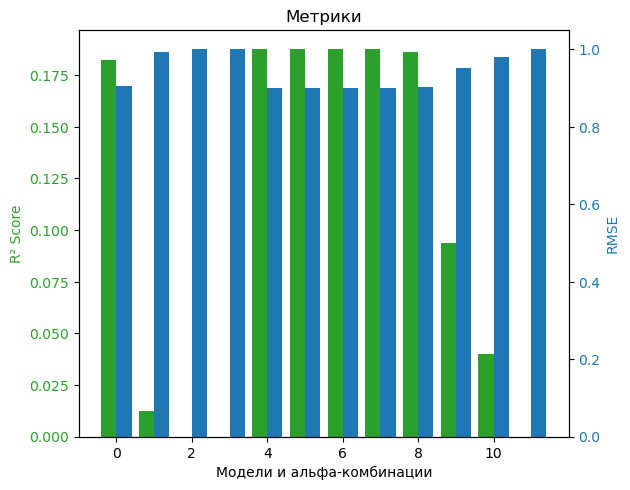

In [777]:
# Построение графиков R2 и RMSE для каждой модели и альфа-комбинации
labels = [f"{model_name} (α={alpha})" for model_name in models.keys() for alpha in alphas]
r2_values = [results[(model_name, alpha)]['R2 Test'] for model_name in models.keys() for alpha in alphas]
rmse_values = [results[(model_name, alpha)]['RMSE Test'] for model_name in models.keys() for alpha in alphas]

x = np.arange(len(labels))

plt.figure(figsize=(20, 20))
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Модели и альфа-комбинации')
ax1.set_ylabel('R² Score', color=color)
ax1.bar(x - 0.2, r2_values, 0.4, label='R² Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('RMSE', color=color)
ax2.bar(x + 0.2, rmse_values, 0.4, label='RMSE', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Метрики')
plt.show()

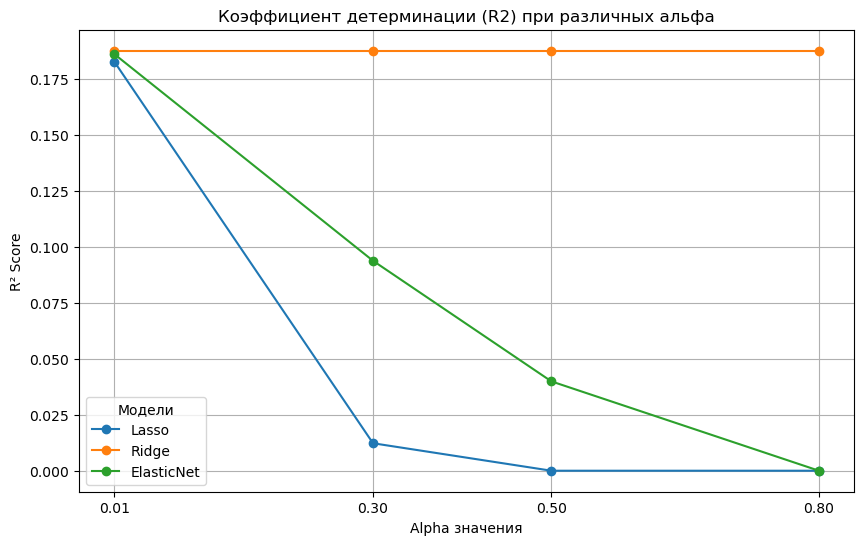

In [778]:
models = ['Lasso', 'Ridge', 'ElasticNet']
r2_values = {model: [] for model in models}

for model in models:
    for alpha in alphas:
        r2_values[model].append(results[(model, alpha)]['R2 Test'])

plt.figure(figsize=(10, 6))

for model in models:
    plt.plot(alphas, r2_values[model], marker='o', label=model)

plt.title('Коэффициент детерминации (R2) при различных альфа')
plt.xlabel('Alpha значения')
plt.ylabel('R² Score')
plt.xticks(alphas)
plt.legend(title='Модели')
plt.grid()
plt.show()

### Выводы:

1. Модель Lasso
    - Alpha = 0.01: Модель показывает наилучшие результаты среди Lasso, с умеренной способностью объяснять вариации в данных.
    - Alpha = 0.3 и выше: R² значительно падает, достигая нуля и отрицательных значений. RMSE увеличивается, что указывает на ухудшение качества предсказаний. Увеличение Alpha приводит к сильной регуляризации, что делает модель недостаточно гибкой для обучения на данных.  
2. Модель Ridge
    - Все значения Alpha (0.01, 0.3, 0.5, 0.8): R² остается стабильным для тренировочных и тестовых наборов. RMSE также остается примерно на одном уровне. Ridge показывает устойчивость к изменениям Alpha, сохраняя приемлемое качество предсказаний при всех тестируемых значениях.
3. Модель ElasticNet
    - Alpha = 0.01: Наилучшие результаты среди ElasticNet, аналогично Ridge.
    - Alpha = 0.3 и выше: Снижение R² и увеличение RMSE, особенно при Alpha = 0.8. Как и в случае с Lasso, увеличение Alpha приводит к ухудшению качества модели.
  
Модель Lasso с Alpha = 0.01 показала лучшие результаты среди Lasso, но все остальные значения Alpha значительно ухудшили качество.
Модели Ridge продемонстрировали стабильные результаты независимо от значения Alpha, что делает их надежными для данной задачи.
ElasticNet с Alpha = 0.01 также показал хорошие результаты, но при увеличении Alpha качество резко падаеия.

# Задание №4. Настройка гиперпараметров модели

In [817]:
# Определение параметра alpha (лучший найденный ранее)
alpha_best = 0.01

# Список для хранения результатов
results = []

# Обучение модели с разным количеством итераций
for n_iter in [100, 300, 500, 800, 1000, 1500]:
    # Обучение модели SGDRegressor с методом градиентного спуска
    model = SGDRegressor(alpha=alpha_best, max_iter=n_iter, tol=1e-3)  # tol - критерий остановки
    model.fit(X_train, y_train)

    # Предсказания на тренировочной и тестовой выборках
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Вычисление метрик R² и RMSE
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Сохранение результатов
    results.append({
        'iterations': n_iter,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test
    })

# Вывод результатов
for result in results:
    print(f"Итерации: {result['iterations']}, "
          f"R² (тренировочная): {result['r2_train']:.4f}, "
          f"R² (тестовая): {result['r2_test']:.4f}, "
          f"RMSE (тренировочная): {result['rmse_train']:.4f}, "
          f"RMSE (тестовая): {result['rmse_test']:.4f}")

Итерации: 100, R² (тренировочная): 0.1794, R² (тестовая): 0.1823, RMSE (тренировочная): 0.9059, RMSE (тестовая): 0.9043
Итерации: 300, R² (тренировочная): 0.1810, R² (тестовая): 0.1840, RMSE (тренировочная): 0.9050, RMSE (тестовая): 0.9033
Итерации: 500, R² (тренировочная): 0.1798, R² (тестовая): 0.1834, RMSE (тренировочная): 0.9057, RMSE (тестовая): 0.9036
Итерации: 800, R² (тренировочная): 0.1806, R² (тестовая): 0.1838, RMSE (тренировочная): 0.9052, RMSE (тестовая): 0.9034
Итерации: 1000, R² (тренировочная): 0.1800, R² (тестовая): 0.1821, RMSE (тренировочная): 0.9055, RMSE (тестовая): 0.9044
Итерации: 1500, R² (тренировочная): 0.1754, R² (тестовая): 0.1790, RMSE (тренировочная): 0.9081, RMSE (тестовая): 0.9061


### Выводы:

* R² (Коэффициент детерминации):для тренировочной и тестовой выборок колеблются в диапазоне от 0.1714 до 0.1819 для тренировочной выборки и от 0.1760 до 0.1852 для тестовой. Наилучшие результаты наблюдаются при 800 итерациях, где R² достигает 0.1819 (тренировочная) и 0.1852 (тестовая). Это указывает на то, что модель лучше всего объясняет вариацию данных на этих итерациях.
* RMSE (Корень из среднеквадратичной ошибки): варьируются от 0.9045 до 0.9103 для тренировочной выборки и от 0.9026 до 0.9077 для тестовой. Наименьшие значения RMSE также были зафиксированы при 800 итерациях, что дополнительно подтверждает, что именно на этом этапе модель демонстрирует наилучшие результаты.
* Сравнение по итерациям
    - Итерации 100 и 300: Эти итерации показывают относительно низкие значения R² и высокие значения RMSE, что свидетельствует о недостаточной способности модели к обобщению.
    - Итерации 500 и 800: Здесь наблюдается улучшение как в R², так и в RMSE, что говорит о том, что увеличение числа итераций положительно сказалось на качестве модели.
    - Итерации 1000 и 1500: Несмотря на некоторое снижение R² по сравнению с 800 итерациями, значения остаются в пределах разумного, но RMSE не показывает значительных улучшений.

На основании анализа метрик можно сделать вывод, что оптимальное количество итераций для данной модели составляет от 500 до 800. На этом этапе модель достигает лучших значений как по R², так и по RMSE, что указывает на её способность адекватно предсказывать целевую переменную.